## 1 - Librerias
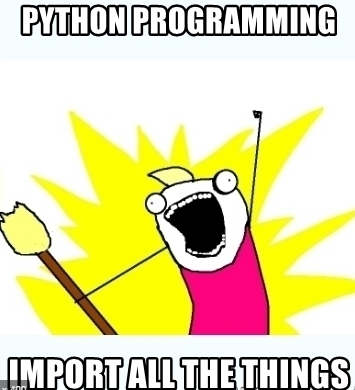

In [ ]:
!pip install googletrans
!pip install pyLDAvis
!pip install emoji
!pip install pysentimiento
!pip install geograpy3
!pip install langdetect
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

In [ ]:
## Declaramos librerías y funciones
import tweepy
from tweepy import OAuthHandler
import time
import pandas as pd
from datetime import datetime

path = "/content/drive/MyDrive/Diplomatura - Compartido/Archivos Batch/"

salida = "/content/drive/MyDrive/Diplomatura - Compartido/Archivos Batch Clean/"
path2 = "/content/drive/MyDrive/Diplomatura - Compartido/"

##lenguaje

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

##Preparacion
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import emoji
from nltk.corpus import stopwords
from string import punctuation  
import re
from nltk import word_tokenize  
from unicodedata import normalize
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import itertools
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import string
from nltk.tokenize import word_tokenize
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from nltk.stem import SnowballStemmer
from googletrans import Translator
translator = Translator()
##polaridad y subjetividad
from textblob import TextBlob
##Visualización
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
##Graficos
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go
from plotly.offline import iplot

import pyLDAvis.sklearn

##Modelo LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

##Nube de palabras
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

##geografia
import geograpy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## 2 - Funciones

### Nube de palabras


In [ ]:
###Función para generar nube
def generateWordCloud(data,exp):
    encuesta = pd.DataFrame()
    encuesta['comentario']=data
    encuesta['comentario']=encuesta['comentario'].astype(str)
    concat_comentarios = " ".join(encuesta for encuesta in encuesta.comentario)
    wordcloud = WordCloud(width=600, height=430, max_words=100,colormap="Dark2",stopwords=stop_words_sp).generate(str(concat_comentarios))#stopwords=stop_words_sp,
    wordcloud.recolor(random_state=1)
    plt.figure(figsize=(15, 8))
    plt.title(exp, fontsize=20,color='blue')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
# Función para sacar el top 20 de palabras más usadas
from sklearn.feature_extraction.text import CountVectorizer 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(analyzer='word').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n] 

### Bigramas y Trigramas

In [ ]:
###funcion bigramas: Palabrás de a dos que más se usan
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

##función trigramas
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


### Análisis de sentimiento
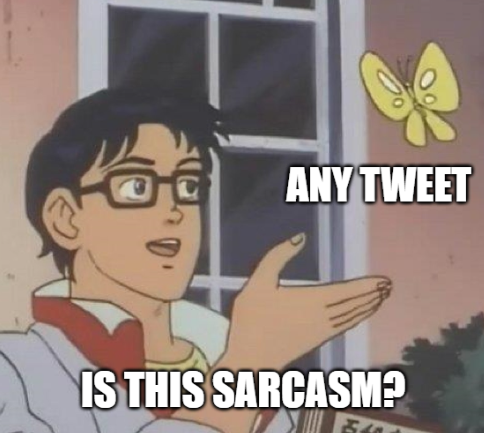

In [ ]:
##funcion de sentimiento
def f(data):
    if data['polaridad'] > 0:
        val = "Positivo"
    elif data['polaridad'] == 0:
        val = "Neutral"
    else:
        val = "Negativo"
    return val

##funcion de sentimiento teniendo en cuenta nps
def funcion_sent_nps(data):
    if data['polaridad'] > 0:
        if data['NPS'] > 7:
            val = "Positivo"
        elif data['NPS'] < 6:
            val = "Negativo"
        else:
            val = "Neutral"
    elif data['polaridad'] == 0:
        if data['NPS'] > 7:
            val = "Positivo"
        elif data['NPS'] < 6:
            val = "Negativo"
        else:
            val = "Neutral"
    else:
        val = "Negativo"
    return val

###Tratamiento de tweets

In [ ]:
##Funcion Stemming
stemmer = SnowballStemmer('english')

def stemming(s):
    palabras=s.split(' ')
    frase=[]
    for p in palabras:
        new_p=stemmer.stem(p)
        frase.append(new_p)        
    return ' '.join(frase)

##Funcion Stopwords
stop_words_sp = stopwords.words('spanish')
stop_words_manual = ['hola','hace','si','Banco','banco','gracia','gracias','buenas tardes','muchas gracias','buenas','tardes','buenos','dias','hola']
stop_words_sp = stop_words_manual + stop_words_sp + stopwords.words('english') + ['RT', 'rt','dm','DM']
def stop_words(s):
    palabras=s.split(' ')
    frase=[]
    for p in palabras:
        if p not in stop_words_sp:
            frase.append(p)
    return ' '.join(frase)


def stop_cuentas(s):
    palabras=s.split(' ')
    frase=[]
    for p in palabras:
        if p not in arroba_cuentas:
            frase.append(p)
    return ' '.join(frase)

##Funcion de limpieza
def limpieza(x): 
    x = x.lower()
    x = re.sub('[%s]' % re.escape(string.punctuation),'', x)
    x = re.sub('\w*\d\w*',' ', x)
    x = re.sub('\[.*?\]', ' ', x)
    x = re.sub(' +',' ',x)
    x = re.sub('[‘’“”…]', ' ', x)
    x = re.sub('\n', ' ', x)
    x = re.sub(r'\w*(twiter|youtube|facebook|instagram|bitly)\w*','',x)
    x = re.sub(r'https?(.*?)(\s|$)',' linkpagina ',x)
    x = re.sub(r'pic\.twitter(.*?)(\s|$)',' ',x)    #
    x = re.sub(r'\B@\S*\s?','',x)  # le saco el @algo
    x = re.sub(r'\B#\S*\s?','',x)
    for i in cuentas:
        x = re.sub(i,'',x)
    #x = re.sub(r'itauargentina','',x)
    x = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", x), 0, re.I )
    x = re.sub(r'(^|\s|\w*)(jaj|kak|jsj|kaj|ksk|jsk)(.*?)(\s|$)',' jaja ',x)
    x = ''.join(re.findall(r'[a-z\s]',x))
    return x

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

from pysentimiento import SentimentAnalyzer
analyzer = SentimentAnalyzer()

def sent_esp(x):
    x = analyzer.predict(x)
    return x

trad = lambda x: sent_esp(x)

### Lematización

In [ ]:
##Lematización
def lematize(text):  
        tokens =  word_tokenize(text)
        tokens = [lemmatizer.lemmatize(x, pos="v") for x in tokens]    
        return tokens 

lemmaDict = {}
with open(path2+'lemmatization-es_v2.txt', 'rb') as f:
    data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
    data = [a.split(u'\t') for a in data]

with open(path2+'lemmatization-es_add_v2 .txt', 'rb') as f:
    data_2 = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
    data_2 = [a.split(u'\t') for a in data_2]

lemmatizacion_manual = data+data_2  # unimos los dos diccionarios y cargamos las keys con valor

for a in lemmatizacion_manual:
    if len(a) >1:
        lemmaDict[a[1]] = a[0]

def my_lemmatizer(word):
       return lemmaDict.get(word, word) 

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lematize(text):  
        tokens =  word_tokenize(text)
        tokens = [lemmatizer.lemmatize(x, pos="v") for x in tokens]    
        return tokens 

### Idiomas


In [ ]:
##Funcion para detectar Idiomas
def idioma(txt):
  try:
    detect(txt)
    return detect(txt)
  except LangDetectException:
    return 'unknow'

### Geografía

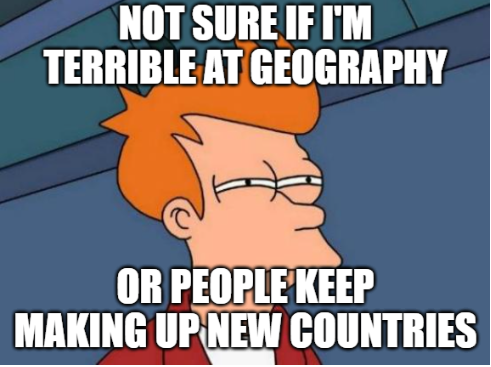

In [ ]:
#Locación

def geografia(locacion):
    texto=locacion
    texto=texto.title()
    places = geograpy.get_geoPlace_context(text=texto)
    return places.countries


def geografia_city(locacion):
    texto=locacion
    texto=texto.title()
    places = geograpy.get_geoPlace_context(text=texto)
    return places.cities


def geografia_other(locacion):
    texto=locacion
    texto=texto.title()
    places = geograpy.get_geoPlace_context(text=texto)
    return places.other    


## 3) Generamos el input de archivos desde Drive

In [ ]:
#Creamos la lista de archivos
archivos = [nombreArchivo for nombreArchivo in os.listdir(path) 
    if nombreArchivo.startswith("twitter_")]
arroba_cuentas=list()
arroba_cuentas2=list()
arroba_cuentas3=list()
for arroba in archivos:
    arroba = re.sub(r'twitter_','',arroba)
    arroba = re.sub('[0-9]','',arroba)
    arroba = re.sub(r'_','',arroba)
    arroba = re.sub(r'.xlsx','',arroba)
    arroba_cuentas2.append(arroba)
    arroba_cuentas.append('@'+arroba)
    #arroba = re.sub(r'_','',arroba)
    #arroba_cuentas3.append(arroba)
stop_words_sp=stop_words_sp+arroba_cuentas2+arroba_cuentas3
arroba_cuentas=arroba_cuentas
cuentas=arroba_cuentas2

In [ ]:
#arroba_cuentas.unique()
arroba_cuentas = set(arroba_cuentas)
arroba_cuentas

{'@BurgerKing', '@McDonalds', '@Wendys', '@kfc'}

In [ ]:
cuentas = set(cuentas)
cuentas

{'BurgerKing', 'McDonalds', 'Wendys', 'kfc'}

In [ ]:
archivos

['twitter_kfc_20201120.xlsx',
 'twitter_BurgerKing_20201120.xlsx',
 'twitter_Wendys_20201120.xlsx',
 'twitter_McDonalds_20201120.xlsx',
 'twitter_BurgerKing_20201127.xlsx',
 'twitter_McDonalds_20201127.xlsx',
 'twitter_kfc_20201127.xlsx',
 'twitter_Wendys_20201127.xlsx']

## 4) Formateamos todos los archivos

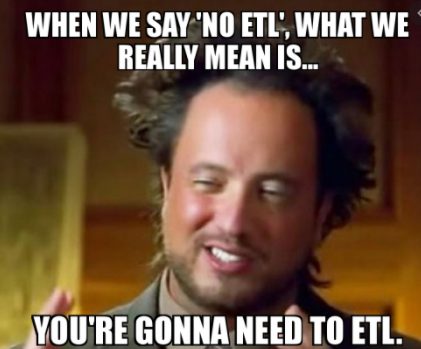

In [ ]:

#traducir = lambda x:translator.translate(x).text
#data['traducción'] = data['comentario_limpio'].apply(traducir)
yaprocesado=list()
for archivo in archivos:
    try:
        archivos=archivos-yaprocesado
        df_aux = pd.read_excel(path+archivo)

        df_aux['comentario_limpio'] = df_aux['reply'].apply(stop_cuentas)
        df_aux['comentario_limpio'] = df_aux['comentario_limpio'].apply(limpieza)
        df_aux['comentario_tokenizado'] = df_aux['comentario_limpio'].apply(stop_words)
        df_aux['comentario_tokenizado'] = df_aux['comentario_tokenizado'].apply(word_tokenize)
        df_aux['comentario_tokenizado'] = df_aux['comentario_tokenizado'].apply(lambda x: ' '.join([x for x in x if len(x) > 3]))
        df_aux['comentario_lematizado'] = df_aux['comentario_tokenizado'].apply(lematize)
        df_aux['comentario_lematizado'] = df_aux['comentario_lematizado'].apply(lambda x: ' '.join([x for x in x if len(x) > 3]))
        df_aux['comentario_stemmizado']=df_aux['comentario_tokenizado'].apply(stemming)
        #translator = Translator()
        #df_aux['traduccion']=df_aux['comentario_limpio'].apply(lambda x:translator.translate(x).text)
        df_aux['polaridad'] = df_aux['comentario_limpio'].apply(pol)
        df_aux['subjetividad'] = df_aux['comentario_limpio'].apply(sub)
        df_aux['lenguaje'] = df_aux['comentario_limpio'].apply(idioma)
        df_aux['locacion_ok'] = df_aux['location'].apply(lambda _: str(_))
        df_aux['locacion_ok'] = df_aux['locacion_ok'].apply(geografia)
        df_aux['city_ok'] = df_aux['location'].apply(lambda _: str(_))
        df_aux['city_ok'] = df_aux['city_ok'].apply(geografia_city)
        df_aux['other_ok'] = df_aux['location'].apply(lambda _: str(_))
        df_aux['other_ok'] = df_aux['other_ok'].apply(geografia_other)
        
        #df_aux['traduccion_token'] = df_aux['comentario_tokenizado'].apply(lambda x: translator.translate(x).text)
        #df_aux['polaridad_token'] = df_aux['comentario_limpio'].apply(pol)
        #df_aux['subjetividad_token'] = df_aux['comentario_limpio'].apply(sub)
        #df_aux['traduccion_nueva'] = df_aux['comentario_limpio'].apply(sent_esp)
        df_aux.to_excel(salida+'clean_'+archivo)
        archivos.remove(archivo)
        #data=df_aux
        #data_info=data
        #data_info=data_info.drop_duplicates(['author'], keep='first')
        #data_info=data_info.reindex()
        #data_info.to_excel(path+archivo)
    except:
        for archivo in archivos:
            df_aux = pd.read_excel(path+archivo)

            df_aux['comentario_limpio'] = df_aux['reply'].apply(stop_cuentas)
            df_aux['comentario_limpio'] = df_aux['comentario_limpio'].apply(limpieza)
            df_aux['comentario_tokenizado'] = df_aux['comentario_limpio'].apply(stop_words)
            df_aux['comentario_tokenizado'] = df_aux['comentario_tokenizado'].apply(word_tokenize)
            df_aux['comentario_tokenizado'] = df_aux['comentario_tokenizado'].apply(lambda x: ' '.join([x for x in x if len(x) > 3]))
            df_aux['comentario_lematizado'] = df_aux['comentario_tokenizado'].apply(lematize)
            df_aux['comentario_lematizado'] = df_aux['comentario_lematizado'].apply(lambda x: ' '.join([x for x in x if len(x) > 3]))
            df_aux['comentario_stemmizado']=df_aux['comentario_tokenizado'].apply(stemming)
            #translator = Translator()
            #df_aux['traduccion']=df_aux['comentario_limpio'].apply(lambda x: translator.translate(x).text)
            df_aux['polaridad'] = df_aux['comentario_limpio'].apply(pol)
            df_aux['subjetividad'] = df_aux['comentario_limpio'].apply(sub)
            df_aux['lenguaje'] = df_aux['comentario_limpio'].apply(idioma)
            df_aux["locacion_ok"] = df_aux['location'].apply(lambda _: str(_))
            df_aux['locacion_ok'] = df_aux['locacion_ok'].apply(geografia)
            df_aux['city_ok'] = df_aux['location'].apply(lambda _: str(_))
            df_aux['city_ok'] = df_aux['city_ok'].apply(geografia_city)
            df_aux['other_ok'] = df_aux['location'].apply(lambda _: str(_))
            df_aux['other_ok'] = df_aux['other_ok'].apply(geografia_other)
            #translator = Translator()
            #df_aux['traduccion_token'] = df_aux['comentario_tokenizado'].apply(lambda x:translator.translate(x).text)
            #df_aux['polaridad_token'] = df_aux['comentario_limpio'].apply(pol)
            #df_aux['subjetividad_token'] = df_aux['comentario_limpio'].apply(sub)
            #df_aux['traduccion_nueva'] = df_aux['comentario_limpio'].apply(sent_esp)
            df_aux.to_excel(salida+'clean_'+archivo)
            archivos.remove(archivo)
print("Carga Finalizada")

Carga Finalizada


In [ ]:
archivos

[]

## 5) Generamos los archivos con topicos

In [ ]:
df_sarasa = df[['fecha','author','destino', 'comentario_lematizado','comentario_tokenizado']]
df_sarasa.head()

,fecha,author,destino,comentario_lematizado,comentario_tokenizado
0,2020-11-20 23:24:22,DeaneM13,McDonalds,billion dollar company cant make work wouldnt ...,billion dollar company cant make work wouldnt ...
1,2020-11-20 23:22:42,kbear11691,McDonalds,southern style chicken sandwich thank bring ba...,southern style chicken sandwich thank bringing...
2,2020-11-20 23:22:22,MishaFigs,McDonalds,beyond gross crazy,beyond gross crazy
3,2020-11-20 23:21:41,Drizzylucas19,McDonalds,grill cheese,grilled cheese
4,2020-11-20 23:20:36,faith_d_,McDonalds,oakleymurphy,oakleymurphy


In [ ]:
cuentas
unigrama = pd.DataFrame()
bigrama = pd.DataFrame()
trigrama = pd.DataFrame()
lista_colum = ['comentario_tokenizado','comentario_lematizado']

for x in cuentas:
    data=df_sarasa
    data['comentario_tokenizado'] =  data['comentario_tokenizado'].apply(lambda _: str(_))
    data['comentario_lematizado'] =  data['comentario_lematizado'].apply(lambda _: str(_)) 
    data = (data[data['destino']==x])
    for columna in lista_colum:
        common_words = get_top_n_words(data[columna], 10)
        palabra = pd.DataFrame(common_words, columns = ['Palabra' , 'count'])
        sarasa = palabra.groupby(['Palabra']).sum()['count'].reset_index(name='count')
        sarasa['destino']=x
        sarasa['filtro']=columna
        unigrama = unigrama.append(sarasa)

        common_words = get_top_n_bigram(data[columna], 10)
        palabra = pd.DataFrame(common_words, columns = ['Palabra' , 'count'])
        sarasa = palabra.groupby(['Palabra']).sum()['count'].reset_index(name='count')
        sarasa['destino']=x
        sarasa['filtro']=columna
        bigrama = bigrama.append(sarasa)

        common_words = get_top_n_trigram(data[columna], 10)
        palabra = pd.DataFrame(common_words, columns = ['Palabra' , 'count'])
        sarasa = palabra.groupby(['Palabra']).sum()['count'].reset_index(name='count')
        sarasa['destino']=x
        sarasa['filtro']=columna
        trigrama = trigrama.append(sarasa)

unigrama.to_excel(cwds + '/unigramas.xlsx')
bigrama.to_excel(cwds + '/bigramas.xlsx')
trigrama.to_excel(cwds + '/trigramas.xlsx')

## 6) Concatenación y subida de archivos limpios

In [ ]:
import os
import pandas as pd
import csv 
import json 

In [ ]:
# Función para convertir CSV a JSON 
 
def make_json(csvFilePath, jsonFilePath): 
  # creamos un dictionario
    data = {} 
      
    # Abrimos un csv reader llamado DictReader 
    with open(csvFilePath, encoding='utf-8') as csvf: 
        csvReader = csv.DictReader(csvf) 
          
        # Convertimos cada linea en un diccionario  
        # y lo agregamos a data 
        for rows in csvReader: 
              
            # Asumimos que la columna llamada 'No' es la primary key 
            key = rows['No'] 
            data[key] = rows 
  
    # Abrimos un json writer, y usamos json.dumps()  
    # función para dump data 
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonf.write(json.dumps(data, indent=4)) 

In [ ]:
cwd = os.path.abspath('/content/drive/MyDrive/Diplomatura - Compartido/Archivos Batch Clean') 
cwds = os.path.abspath('/content/drive/MyDrive/Diplomatura - Compartido/Archivos Batch Clean/Archivos_Salida')
cwdp = os.path.abspath('/content/drive/MyDrive/Diplomatura - Compartido/Archivos Batch Clean/Archivos_Procesados')
files = os.listdir(cwd) 
files

['Archivos_Salida',
 'Archivos_Procesados',
 'clean_twitter_kfc_20201120.xlsx',
 'clean_twitter_Wendys_20201120.xlsx',
 'clean_twitter_BurgerKing_20201127.xlsx',
 'clean_twitter_kfc_20201127.xlsx',
 'clean_twitter_BurgerKing_20201120.xlsx',
 'clean_twitter_McDonalds_20201127.xlsx',
 'clean_twitter_McDonalds_20201120.xlsx',
 'clean_twitter_Wendys_20201127.xlsx']

In [ ]:
##Concatenamos todos los archivos
df = pd.DataFrame()
for file in files:
     if file.endswith('.xlsx'):
         df = df.append(pd.read_excel(cwd + '/' + file), ignore_index=True) 

In [ ]:
##Guardamos en excel los concatenados
df.to_excel(cwds + '/concat_twits.xlsx')

In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df['No'] = df.reset_index().index

In [ ]:
##Guardamos en csv los concatenados 
df.to_csv(cwds + '/concat_twits.csv', index = None, header=True) 

In [ ]:
##Convertimos el CSV en JSON para guardar datos historicos en Mongo
csvFilePath = (cwds + '/concat_twits.csv')
jsonFilePath = (cwds + '/concat_twits.json')

csvFile = pd.DataFrame(pd.read_csv(csvFilePath, sep = ",", header = 0, index_col = False))
csvFile.to_json(jsonFilePath, orient = "records", date_format = "epoch", double_precision = 10, force_ascii = True, date_unit = "ms", default_handler = None)
  
# Call the make_json function 
#make_json(csvFilePath, jsonFilePath)

In [ ]:
csvFile = pd.DataFrame(pd.read_csv(csvFilePath, sep = ",", header = 0, index_col = False))
csvFile.to_json(jsonFilePath, orient = "records", date_format = "epoch", double_precision = 10, force_ascii = True, date_unit = "ms", default_handler = None)

### Archivo para nube de palabras en Tableau

In [ ]:
##Armamos un segundo DF con los campos para hacer la lista de palabras
df_Words = df[['fecha','author','destino', 'comentario_lematizado']]

In [ ]:
##Separamos las palabras por espacios
df_Words2 = df_Words.loc[:, 'comentario_lematizado'].str.split(" ", n = 255, expand = True) 

In [ ]:
##Unimos los DF
tiwts_word = pd.concat([df_Words, df_Words2], axis=1, sort=False)

In [ ]:
##Guardamos en excel
tiwts_word.to_excel(cwds + '/twits_words.xlsx')

In [ ]:
##Movemos archivos procesados a la carpeta de procesados
for file in files:
      if os.path.isfile(os.path.join(cwd, file)):
        os.rename(os.path.join(cwd, file), os.path.join(cwdp, file))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
